In [1]:
import astroquery
from astroquery.sdss import SDSS


from astropy import coordinates as coords
import astropy.units as u
import astropy.coordinates as coord

import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

AWS_ACCESS_KEY_ID = os.environ['AWS_ACCESS_KEY_ID']
AWS_SECRET_ACCESS_KEY = os.environ['AWS_SECRET_ACCESS_KEY']


In [3]:
import boto3
s3 = boto3.resource('s3', aws_access_key_id=AWS_ACCESS_KEY_ID, aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


In [4]:
query = "SELECT COUNT(*) as specObc_count FROM specObj where zWarning = 0"
res = SDSS.query_sql(query)
print(res)

specObc_count
-------------
      3695557


In [5]:
var_l = ['specObjID', 'plateID', 'targetObjID',
         'ra', 'dec', 'class', 'subclass', 'z',
         'zErr', 'velDisp', 'waveMin', 'waveMax',
         'spectroFlux_g', 'spectroFlux_r', 'spectroFlux_i']

var_l_str = ', '.join(var_l)
var_l_str

'specObjID, plateID, targetObjID, ra, dec, class, subclass, z, zErr, velDisp, waveMin, waveMax, spectroFlux_g, spectroFlux_r, spectroFlux_i'

In [6]:

n=500000
i_max = np.ceil(3695557/500000)
for i in np.arange(0,i_max+1):
    print(f'Starting loop {str(int(i))}')
    try:
        query = f"""
        SELECT {var_l_str}
        FROM ( 
            SELECT *, ROW_NUMBER() OVER (ORDER BY specObjID) as rn 
            FROM specObj
        ) x 
        WHERE zWarning = 0 and rn > {i*500000} and rn <= {i*500000+n-1}
        """
        res = SDSS.query_sql(query, )
        res_df = res.to_pandas()
        res_df[['class', 'subclass']] = res_df[['class', 'subclass']].astype(str)
        s3_filepath = 's3://dpg-astro-bucket/sdss/sdss' + str(int(i)) + '.csv'
        res_df.to_csv(s3_filepath)
        print(f'File saved to {s3_filepath}')
    except Exception as e:
        raise(e)

Starting loop 0


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/fsspec/registry.py:273: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


File saved to s3://dpg-astro-bucket/sdss/sdss0.csv
Starting loop 1


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


File saved to s3://dpg-astro-bucket/sdss/sdss1.csv
Starting loop 2


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


File saved to s3://dpg-astro-bucket/sdss/sdss2.csv
Starting loop 3


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


File saved to s3://dpg-astro-bucket/sdss/sdss3.csv
Starting loop 4


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


File saved to s3://dpg-astro-bucket/sdss/sdss4.csv
Starting loop 5


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


File saved to s3://dpg-astro-bucket/sdss/sdss5.csv
Starting loop 6


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


File saved to s3://dpg-astro-bucket/sdss/sdss6.csv
Starting loop 7


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


File saved to s3://dpg-astro-bucket/sdss/sdss7.csv
Starting loop 8


/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


File saved to s3://dpg-astro-bucket/sdss/sdss8.csv


## Now let's merge the files back together.

In [6]:
my_bucket = s3.Bucket('dpg-astro-bucket')

file_l = []
for object_summary in my_bucket.objects.filter(Prefix="sdss/"):
    if 'csv' in object_summary.key:
        filepath = 's3://dpg-astro-bucket/' + object_summary.key
        file_l.append(filepath)

file_l

['s3://dpg-astro-bucket/sdss/sdss0.csv',
 's3://dpg-astro-bucket/sdss/sdss1.csv',
 's3://dpg-astro-bucket/sdss/sdss2.csv',
 's3://dpg-astro-bucket/sdss/sdss3.csv',
 's3://dpg-astro-bucket/sdss/sdss4.csv',
 's3://dpg-astro-bucket/sdss/sdss5.csv',
 's3://dpg-astro-bucket/sdss/sdss6.csv',
 's3://dpg-astro-bucket/sdss/sdss7.csv',
 's3://dpg-astro-bucket/sdss/sdss8.csv']

In [7]:
sdss_df = pd.DataFrame()

for filepath in file_l:
    if sdss_df.empty:
        sdss_df = pd.read_csv(filepath, index_col=0)
    else:
        sdss_df = pd.concat([sdss_df, pd.read_csv(filepath, index_col=0)])

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/fsspec/registry.py:273: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [8]:
sdss_df

,specObjID,plateID,targetObjID,ra,dec,class,subclass,z,zErr,velDisp,waveMin,waveMax,spectroFlux_g,spectroFlux_r,spectroFlux_i
0,2.994897e+17,2.994894e+17,284722522357889,146.714210,-1.041304,GALAXY,STARFORMING,0.021222,0.000009,131.86360,3824.723,9210.856,140.295000,327.952200,499.945200
1,2.994900e+17,2.994894e+17,284705867235602,146.744130,-0.652191,GALAXY,NaN,0.203783,0.000039,174.16480,3824.723,9210.856,9.335421,34.651100,57.451600
2,2.994902e+17,2.994894e+17,284722522489016,146.902290,-0.984913,QSO,BROADLINE,0.652417,0.000089,0.00000,3823.843,9210.856,13.408740,15.180420,17.937660
3,2.994905e+17,2.994894e+17,284705867169913,146.628570,-0.765137,GALAXY,STARFORMING,0.064656,0.000021,123.03630,3823.843,9210.856,30.387320,71.796320,113.153800
4,2.994911e+17,2.994894e+17,284722522357956,146.631670,-0.988278,GALAXY,STARFORMING,0.052654,0.000009,41.80391,3824.723,9210.856,15.627490,24.446420,32.267840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232501,1.125927e+19,1.125900e+19,1237680251097908025,30.730869,27.545920,GALAXY,NaN,1.001355,0.000044,0.00000,3617.429,10263.610,1.644910,1.678204,1.709793
232502,1.125927e+19,1.125900e+19,1237680251097907698,30.745001,27.516204,QSO,BROADLINE,0.676123,0.000085,0.00000,3617.429,10360.960,6.814138,7.731938,8.374857
232503,1.125927e+19,1.125900e+19,1237680251634909225,31.114324,27.943791,QSO,BROADLINE,0.953107,0.000212,0.00000,3617.429,10360.960,33.123680,36.292810,32.860130
232504,1.125927e+19,1.125900e+19,1237680251098104445,31.184763,27.584659,GALAXY,NaN,0.611911,0.000486,229.17310,3617.429,10360.960,0.504637,1.409480,3.410713


In [9]:
int_cols = ['specObjID', 'plateID', 'targetObjID']
str_cols = ['class', 'subclass']
float_cols = ['ra', 'dec', 'z', 'zErr', 'velDisp', 'waveMin', 'waveMax', 'spectroFlux_g', 'spectroFlux_r', 'spectroFlux_i']

In [10]:
sdss_df[int_cols] = sdss_df[int_cols].astype(int)
sdss_df[str_cols] = sdss_df[str_cols].astype(str)
sdss_df[float_cols] = sdss_df[float_cols].astype(float)


In [11]:
sdss_df = sdss_df.reset_index(drop=True)

In [12]:
sdss_df.index

RangeIndex(start=0, stop=3695550, step=1)

## Lets do some simple eda

In [13]:
list(sdss_df.columns)

['specObjID',
 'plateID',
 'targetObjID',
 'ra',
 'dec',
 'class',
 'subclass',
 'z',
 'zErr',
 'velDisp',
 'waveMin',
 'waveMax',
 'spectroFlux_g',
 'spectroFlux_r',
 'spectroFlux_i']

In [14]:
feature_cols = ['ra', 'dec', 'z', 'zErr', 'velDisp', 'waveMin',
                'waveMax', 'spectroFlux_g', 'spectroFlux_r', 'spectroFlux_i']

In [15]:
labels = sdss_df['class'].unique()
print(labels)

['GALAXY' 'QSO' 'STAR']


In [128]:
def class_distribution(df, target, classes=labels):
    """
    This function plots the distribution of given data[label].
    
    Parameters
    ----------
    `df`: dataset
    `label`: target name in the dataset
    
    Returns none.
    """
    class_df = df[target].value_counts().to_frame()
    pers = class_df.apply(lambda x: round((x / df.shape[0]) * 100, 2))
    class_df['Percentage'] = pers
    class_df = class_df.reset_index()

    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    bars = sns.barplot(x=class_df['count'], y=class_df[target])
    for i in bars.containers:
        bars.bar_label(i,rotation=270)

    plt.title(label='Class Distribution', fontsize=10)

    plt.subplot(122)
    plt.pie(x=class_df['Percentage'].values,
            labels=class_df[target],
            autopct='%1.1f%%')
    plt.title(label='Class Proportion', fontsize=10)
    plt.show()

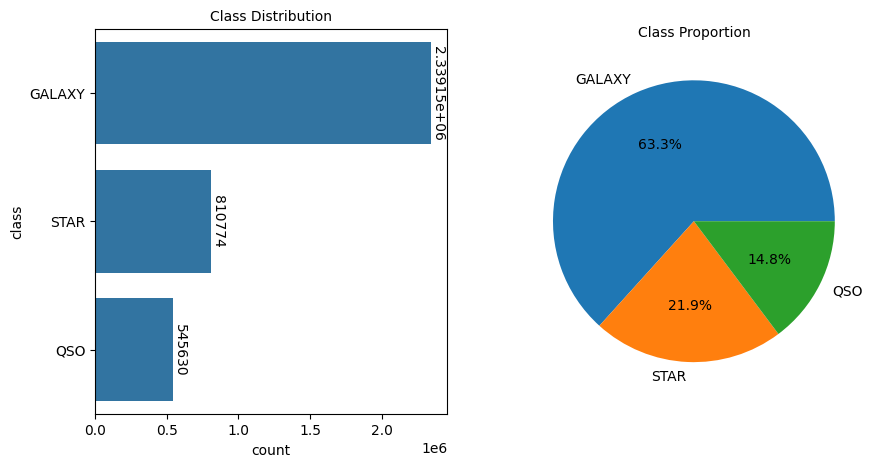

In [129]:
class_distribution(sdss_df, 'class')

In [127]:
qso_df = sdss_df[sdss_df['class'] == 'QSO'].reset_index()

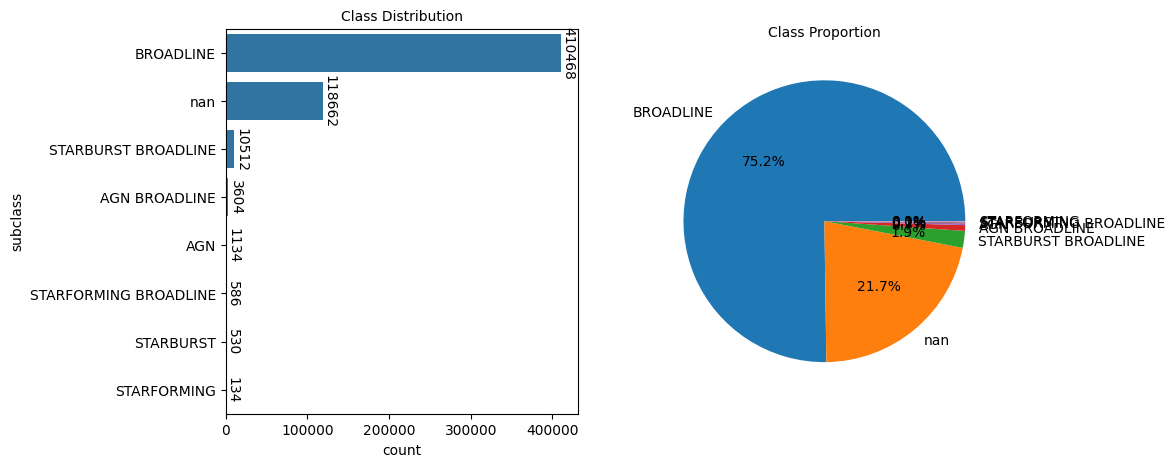

In [130]:
class_distribution(qso_df, 'subclass')

In [43]:
sdss_df

,specObjID,plateID,targetObjID,ra,dec,class,subclass,z,zErr,velDisp,waveMin,waveMax,spectroFlux_g,spectroFlux_r,spectroFlux_i
0,299489677444933632,299489402567026688,284722522357889,146.714210,-1.041304,GALAXY,STARFORMING,0.021222,0.000009,131.86360,3824.723,9210.856,140.295000,327.952200,499.945200
1,299489952322840576,299489402567026688,284705867235602,146.744130,-0.652191,GALAXY,nan,0.203783,0.000039,174.16480,3824.723,9210.856,9.335421,34.651100,57.451600
2,299490227200747520,299489402567026688,284722522489016,146.902290,-0.984913,QSO,BROADLINE,0.652417,0.000089,0.00000,3823.843,9210.856,13.408740,15.180420,17.937660
3,299490502078654464,299489402567026688,284705867169913,146.628570,-0.765137,GALAXY,STARFORMING,0.064656,0.000021,123.03630,3823.843,9210.856,30.387320,71.796320,113.153800
4,299491051834468352,299489402567026688,284722522357956,146.631670,-0.988278,GALAXY,STARFORMING,0.052654,0.000009,41.80391,3824.723,9210.856,15.627490,24.446420,32.267840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695545,-9223372036854775808,-9223372036854775808,1237680251097908025,30.730869,27.545920,GALAXY,nan,1.001355,0.000044,0.00000,3617.429,10263.610,1.644910,1.678204,1.709793
3695546,-9223372036854775808,-9223372036854775808,1237680251097907698,30.745001,27.516204,QSO,BROADLINE,0.676123,0.000085,0.00000,3617.429,10360.960,6.814138,7.731938,8.374857
3695547,-9223372036854775808,-9223372036854775808,1237680251634909225,31.114324,27.943791,QSO,BROADLINE,0.953107,0.000212,0.00000,3617.429,10360.960,33.123680,36.292810,32.860130
3695548,-9223372036854775808,-9223372036854775808,1237680251098104445,31.184763,27.584659,GALAXY,nan,0.611911,0.000486,229.17310,3617.429,10360.960,0.504637,1.409480,3.410713


In [112]:
def box_plotter(df, features, target):
    """
    This is funtion helps in plotting the boxplot of data.
    
    Parameters
    ----------
    `df`: dataset
    `features`: columns for analysis
    `target`: target column name
    
    Returns none.
    """
    fig, axs = plt.subplots(int(np.ceil(len(features)/3)), 3, figsize=(20, 25))
    for (i, feature) in zip(range(len(features)), features):
        ax_i = axs[int(np.floor(i/3)), int(np.mod(i, 3))]
        sns.boxplot(x=target, y=feature, data=df, width=0.5,
                    flierprops={'marker': 'x'}, hue=target, ax=ax_i)
        ax_i.set_title('Boxplot of {}'.format(feature), fontweight="bold", size=10)
        ax_i.set_xlabel(xlabel=None)
        ax_i.set_ylabel(ylabel=None)
        i += 1
    plt.show()

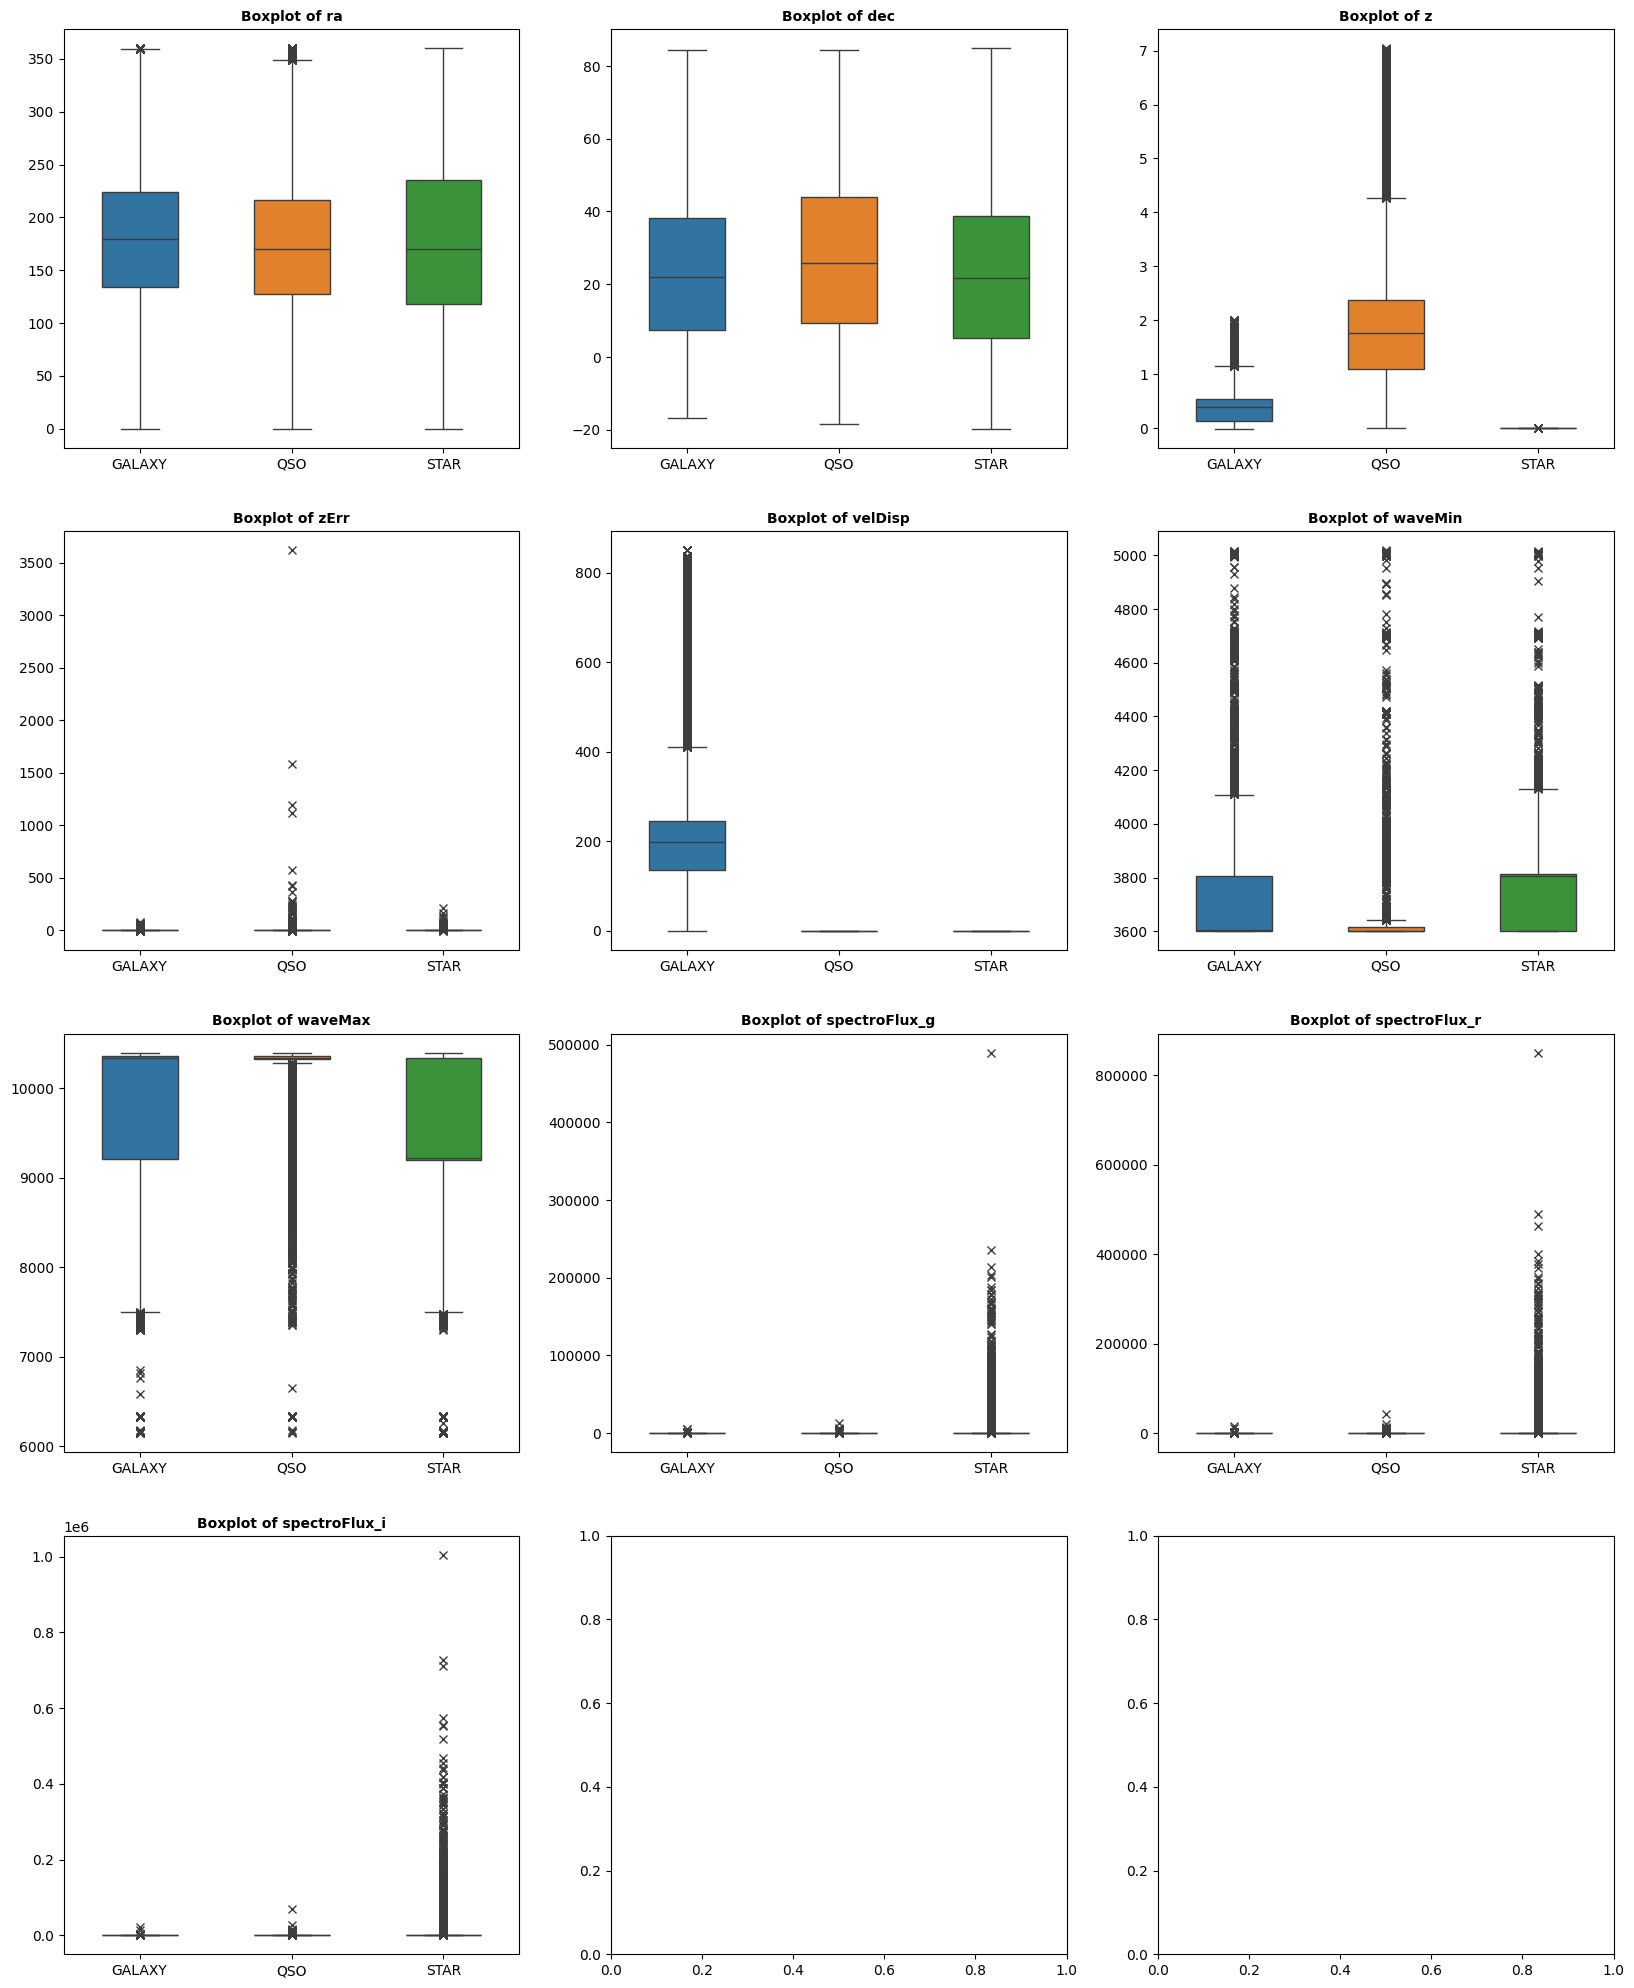

In [125]:
box_plotter(df = sdss_df,features = feature_cols, target='class')


## Lets remove outliers

### Removing outlier by class

In [132]:
sdss_noOutlier_df = pd.DataFrame()

for cls in sdss_df['class']:
    tmp_df = sdss_df[sdss_df['class'] == cls]
    tmp_df = tmp_df[(np.abs(stats.zscore(tmp_df[feature_cols])) < 3).all(axis=1)].reset_index(drop=True)
    if sdss_noOutlier_df.empty:
        sdss_noOutlier_df = tmp_df.reset_index(drop=True)
    else:
        sdss_noOutlier_df = pd.concat([sdss_noOutlier_df, tmp_df]).reset_index(drop=True)

: 

In [ ]:
sdss_noOutlier_df

In [ ]:
# sdss_df = sdss_df[(np.abs(stats.zscore(sdss_df[feature_cols])) < 3).all(axis=1)].reset_index(drop=True)

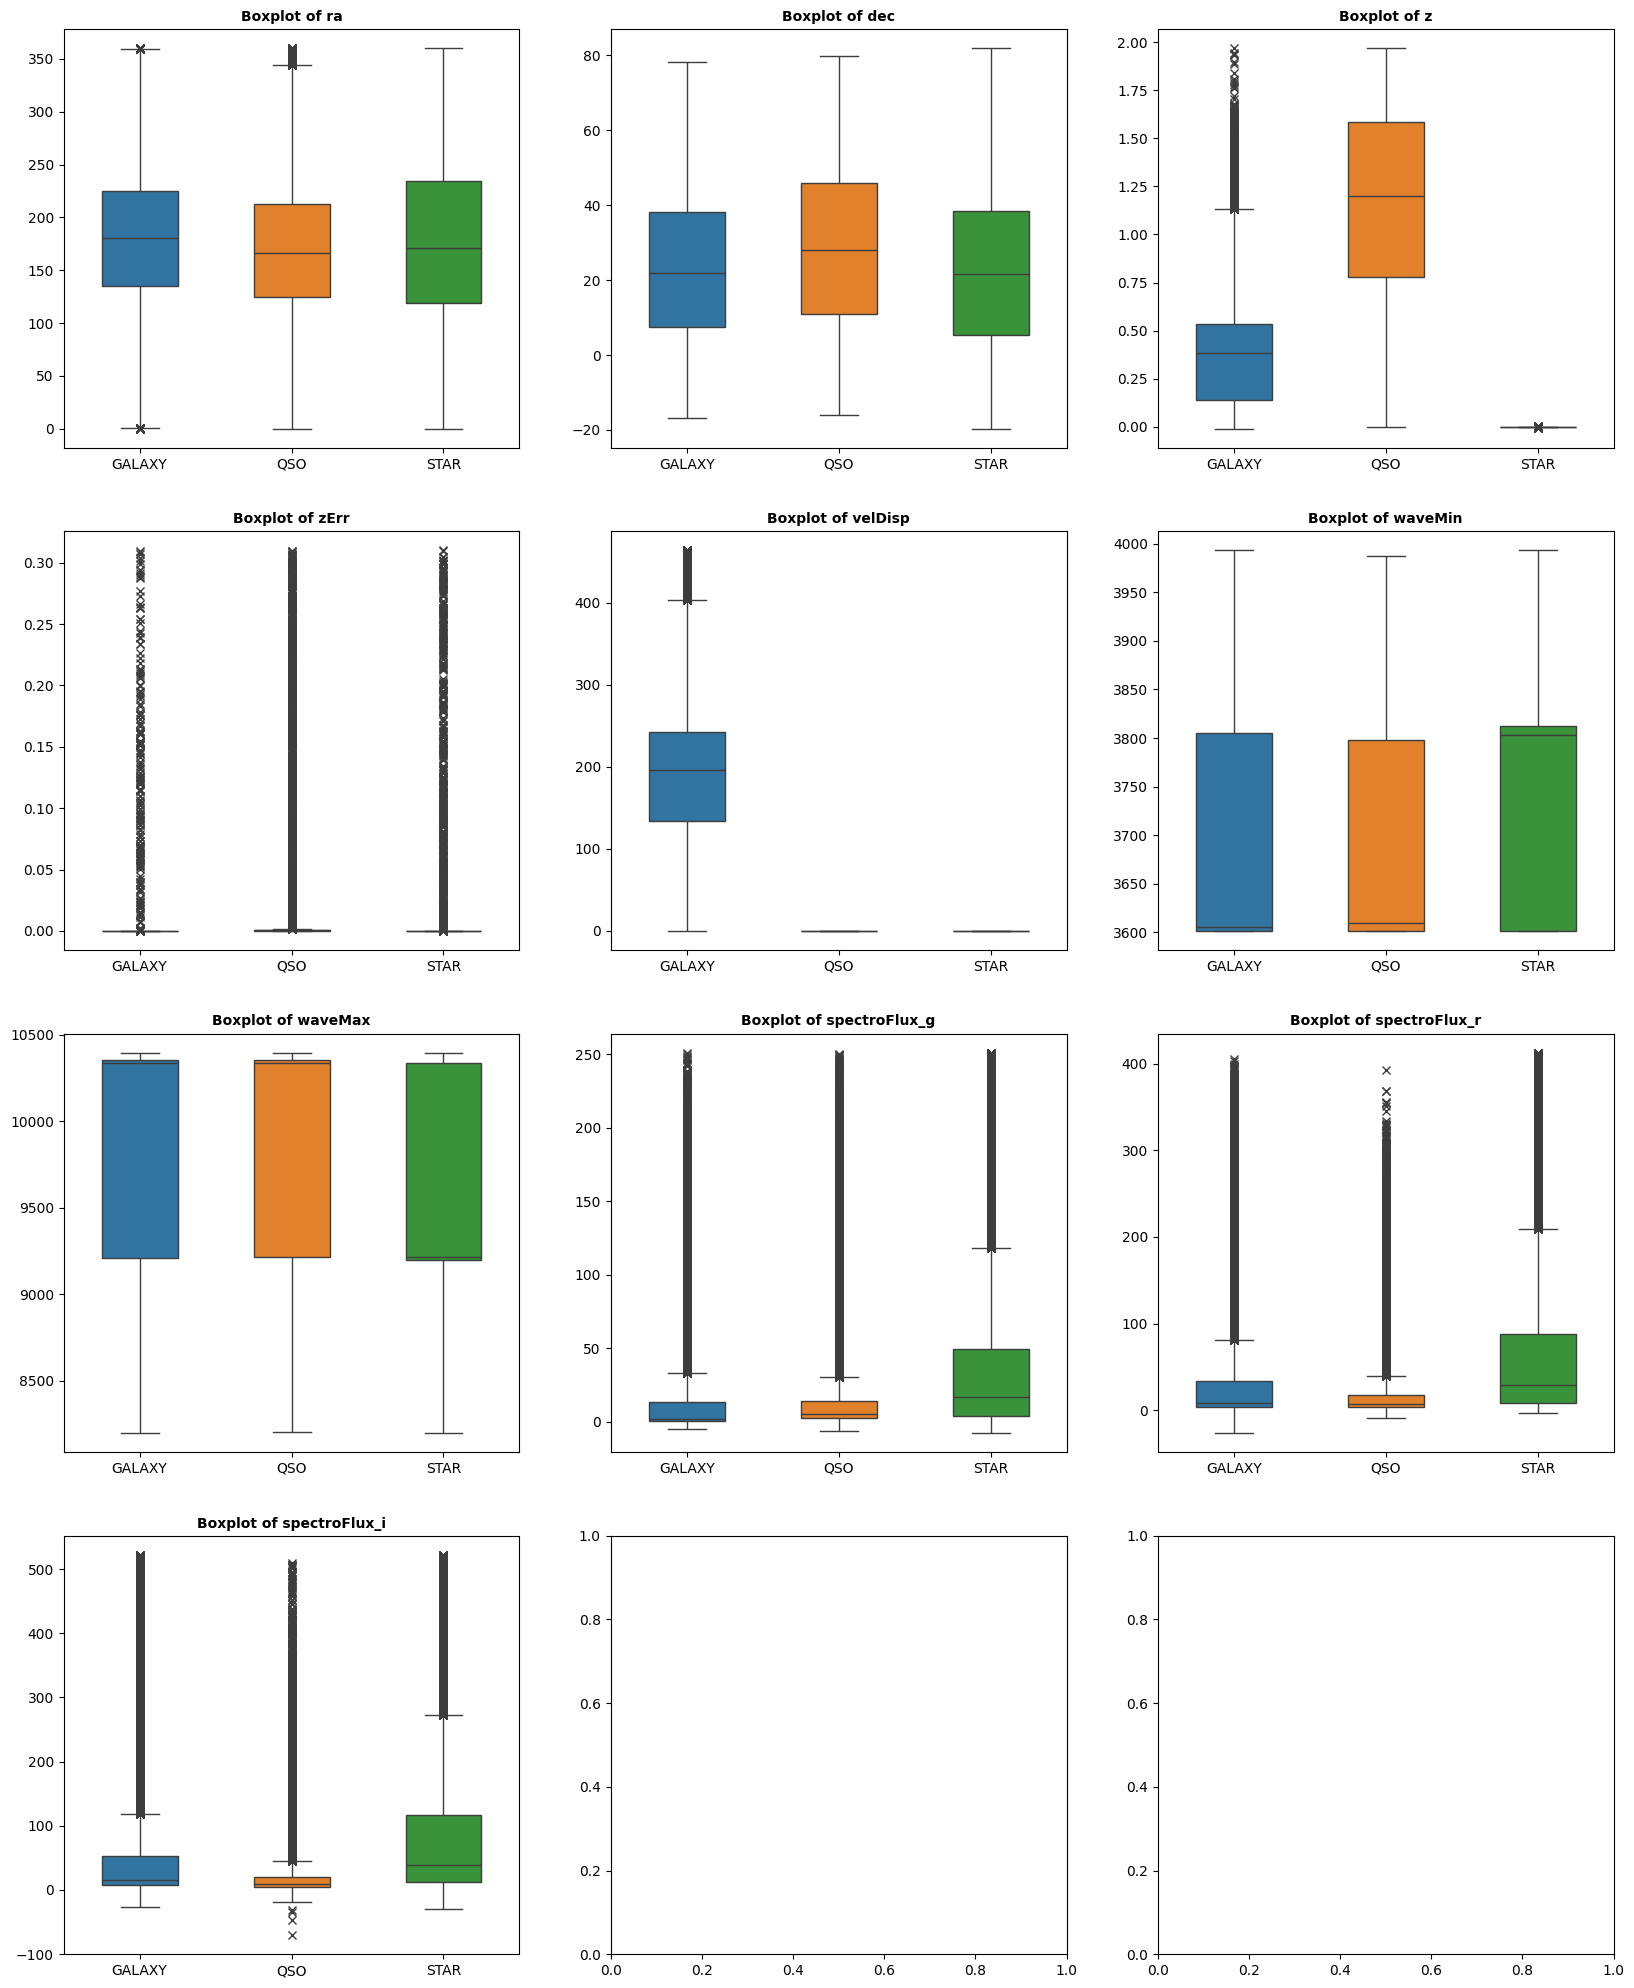

In [113]:
box_plotter(df = sdss_df,features = feature_cols, target='class')


In [114]:
def pdf_plotter(df, features, target):
    """
    This is funtion helps in plotting the pdf of data.
    
    Parameters
    ----------
    `df`: dataset
    `features`: columns for analysis
    `target`: target column name
    
    Returns none.
    """
    fig, axs = plt.subplots(int(np.ceil(len(features)/3)), 3, figsize=(20, 25))
    for (i, feature) in zip(range(len(features)), features):
        ax_i = axs[int(np.floor(i/3)), int(np.mod(i, 3))]
        sns.kdeplot(data=df, x=feature, hue=target, shade=True, ax=ax_i)
        ax_i.set_title('PDF of {}'.format(feature), fontweight="bold", size=10)
        ax_i.set_xlabel(xlabel='')
        ax_i.grid()
        i += 1
    plt.show()

/var/folders/s4/l2klswfj1wvcw_vbmvvbc70h0000gn/T/ipykernel_76697/2491995519.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=feature, hue=target, shade=True, ax=ax_i)
/var/folders/s4/l2klswfj1wvcw_vbmvvbc70h0000gn/T/ipykernel_76697/2491995519.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=feature, hue=target, shade=True, ax=ax_i)
/var/folders/s4/l2klswfj1wvcw_vbmvvbc70h0000gn/T/ipykernel_76697/2491995519.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=feature, hue=target, shade=True, ax=ax_i)
/var/folders/s4/l2klswfj1wvcw_vbmvvbc70h0000gn/T/ipykernel_76697/2491995519.py:16:

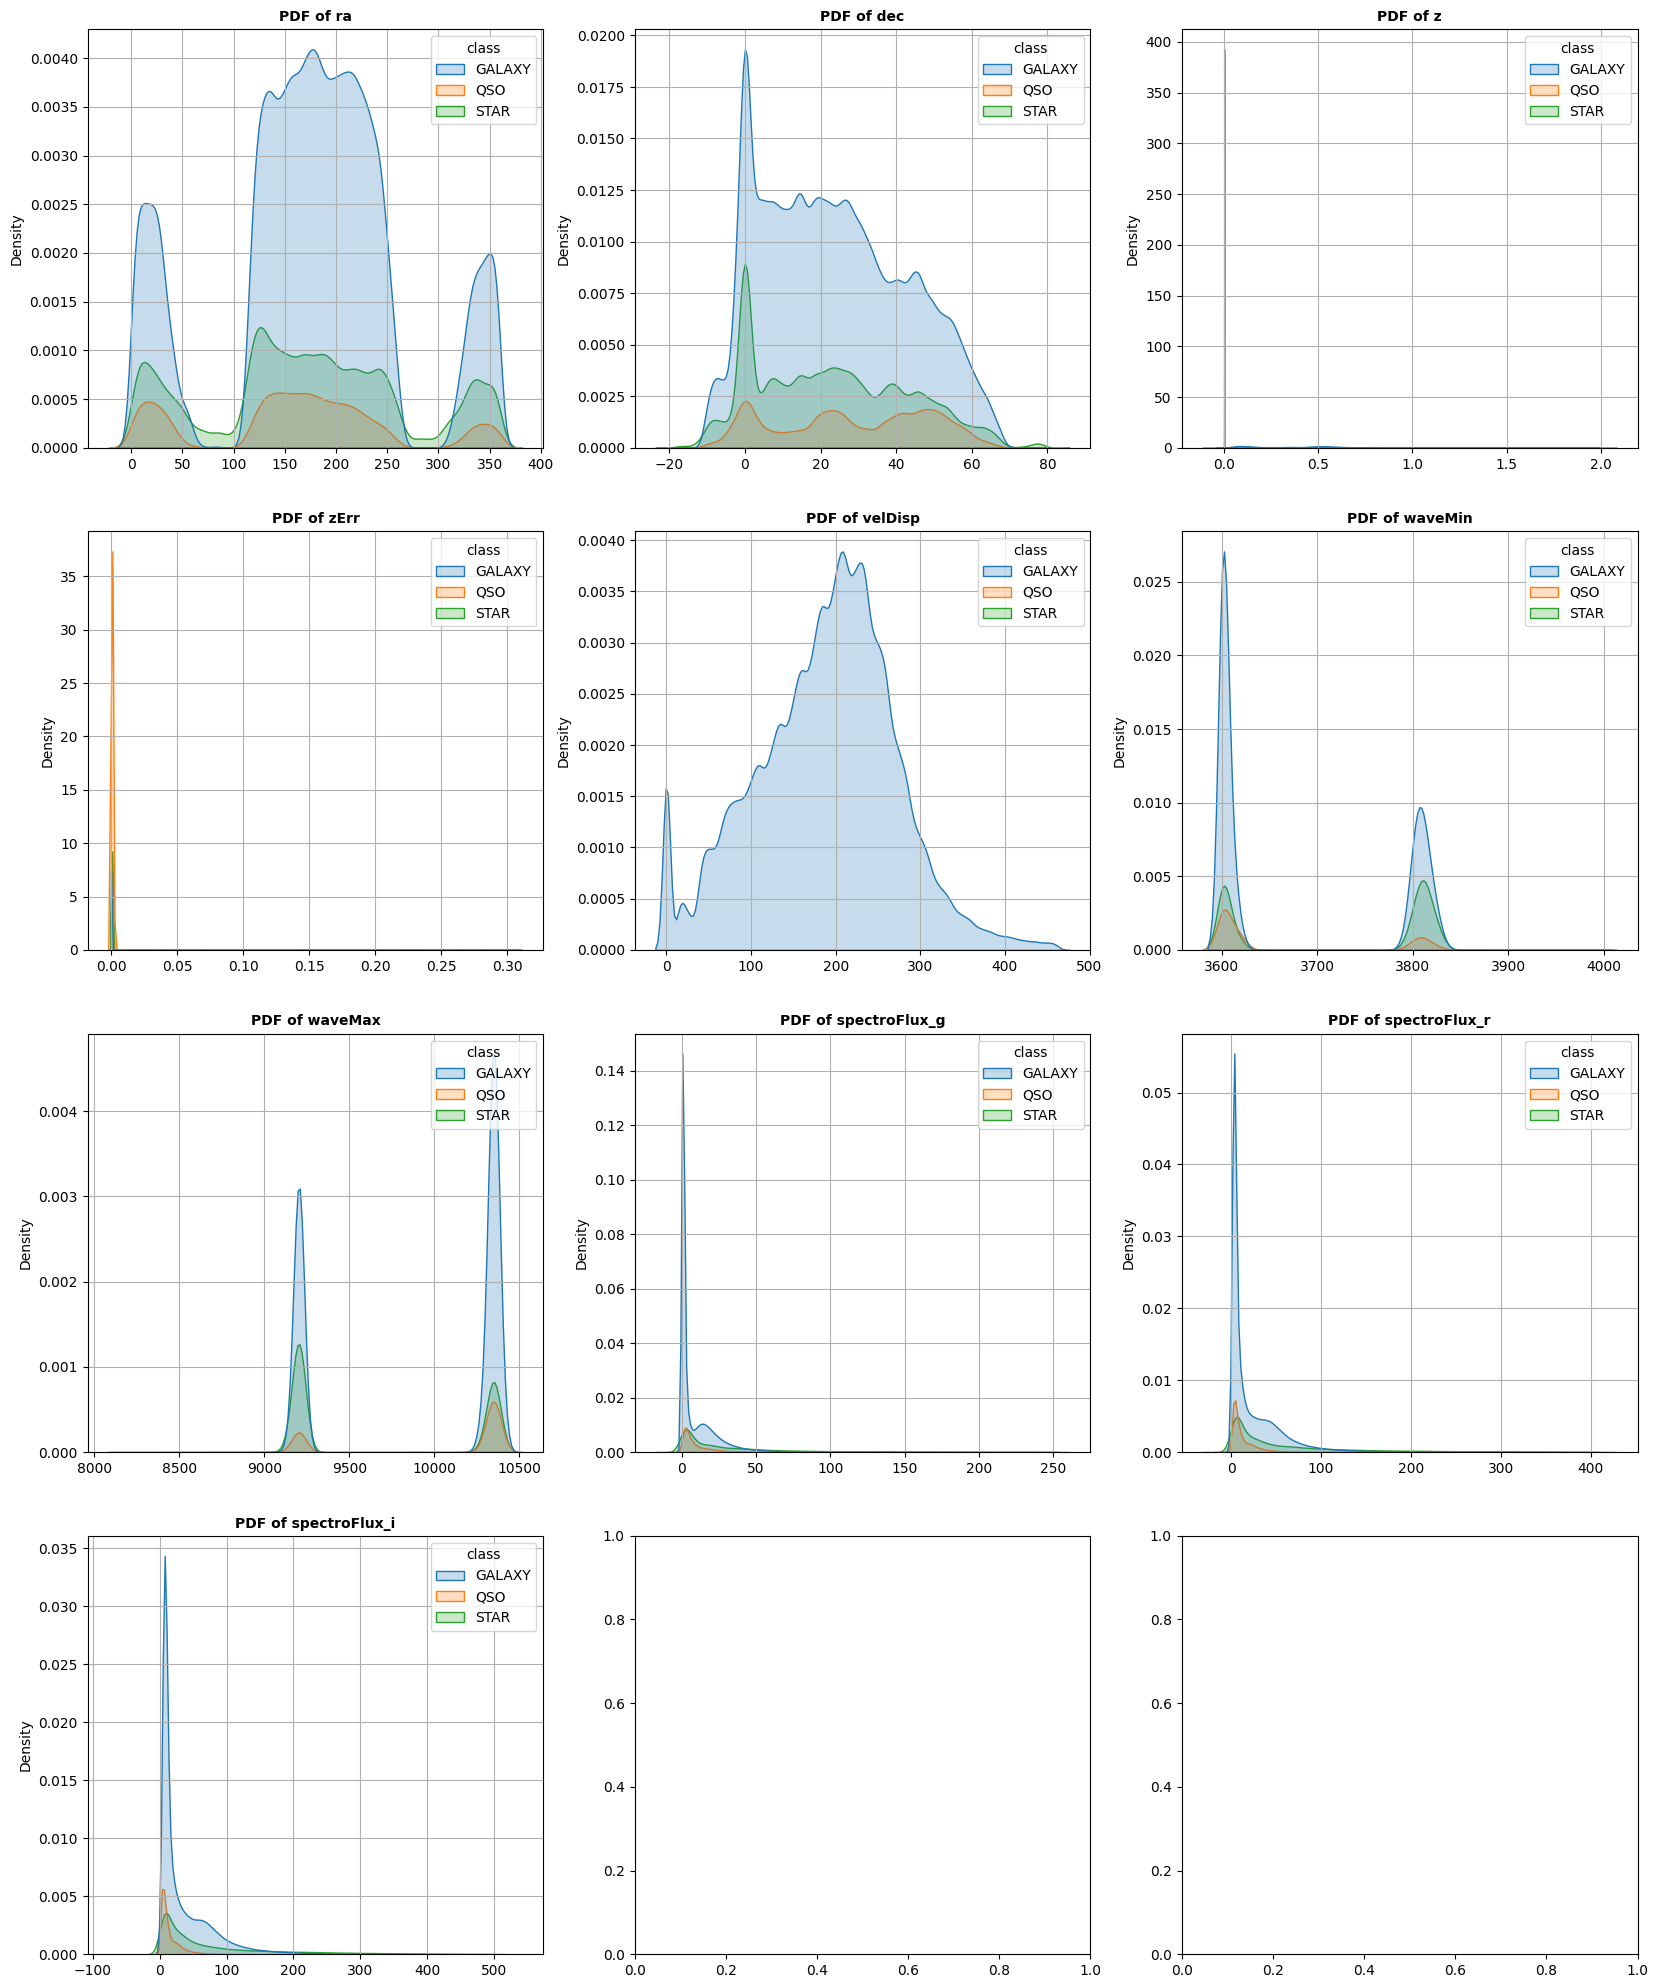

In [115]:
pdf_plotter(sdss_df, feature_cols, 'class')

In [16]:
feature_cols

['ra',
 'dec',
 'z',
 'zErr',
 'velDisp',
 'waveMin',
 'waveMax',
 'spectroFlux_g',
 'spectroFlux_r',
 'spectroFlux_i']

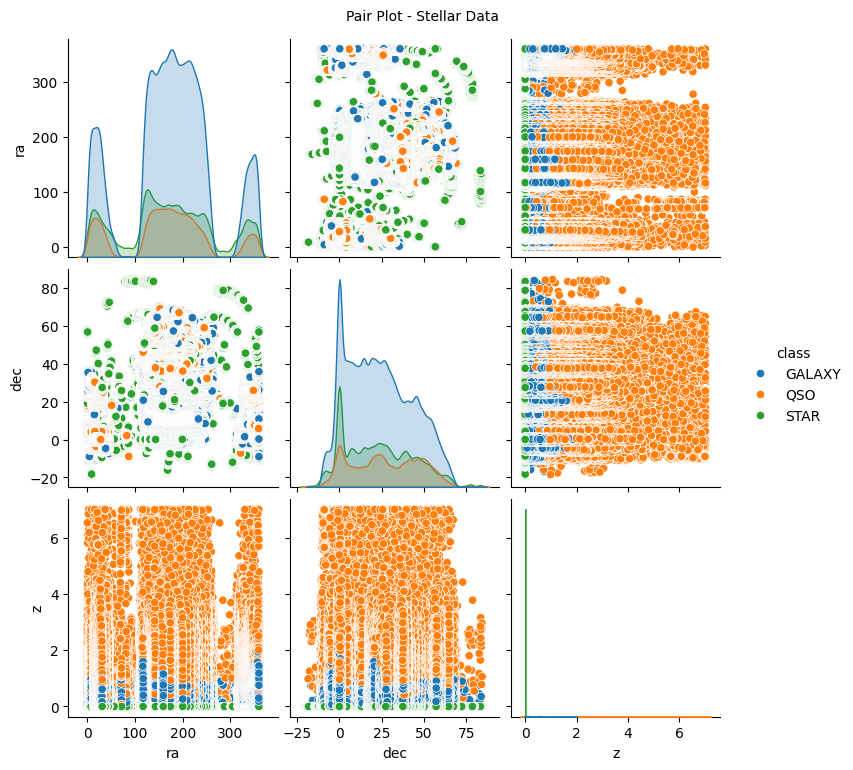

In [17]:
g = sns.pairplot(data=sdss_df[['ra', 'dec', 'z', 'class']],
                 hue='class')
g.fig.suptitle(t='Pair Plot - Stellar Data', y=1.02, fontsize=10)
plt.show()

In [38]:
sdss_df[sdss_df['class']=='QSO'].subclass.value_counts()

subclass
BROADLINE                410468
nan                      118662
STARBURST BROADLINE       10512
AGN BROADLINE              3604
AGN                        1134
STARFORMING BROADLINE       586
STARBURST                   530
STARFORMING                 134
Name: count, dtype: int64

In [25]:
qso_samp_df = sdss_df[(sdss_df['class']=='QSO') & (sdss_df['z'] > 1.57) & (sdss_df['z'] < 5.56)].sample(n=8000, random_state=1234)

In [26]:
qso_samp_df

,specObjID,plateID,targetObjID,ra,dec,class,subclass,z,zErr,velDisp,waveMin,waveMax,spectroFlux_g,spectroFlux_r,spectroFlux_i
3164093,7700033418982039552,7700029570695540736,1237658802036932717,180.677840,55.128416,QSO,BROADLINE,2.594342,0.000260,0.0,3601.637,10344.27,19.710260,24.759600,26.067310
3165008,7701191758843977728,7701155474964459520,1237658311332069650,192.237500,59.367767,QSO,BROADLINE,2.283257,0.000242,0.0,3601.637,10339.51,6.553428,5.429297,5.504210
3493469,8814901385738821632,8814670488301187072,1237678889063547013,39.034912,-2.334199,QSO,BROADLINE,1.879139,0.000283,0.0,3608.278,10356.19,16.421940,17.526490,21.484170
3433848,8575006363549147136,8574853806314991616,1237679461895176868,9.226075,21.127257,QSO,BROADLINE,2.303381,0.000211,0.0,3614.931,10365.73,3.880873,4.352865,5.060710
1901113,5009173858533482496,5009128778560942080,1237660961861468325,128.437820,28.852118,QSO,BROADLINE,2.432759,0.000772,0.0,3601.637,10332.37,8.039039,6.860179,5.359036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538399,6434604390955327488,6434518079296745472,1237654383591424045,145.726870,57.309421,QSO,BROADLINE,2.338936,0.000640,0.0,3601.637,10346.66,5.896080,6.445325,6.389973
2812036,6988622454655524864,6988460826450440192,1237679502707786158,358.843980,19.099155,QSO,BROADLINE,2.252370,-1.000000,0.0,3607.447,10365.73,4.336010,4.454962,4.968318
3222833,7988447416931033088,7988259950202695680,1237653616397517062,161.770120,59.344882,QSO,BROADLINE,2.433542,0.000626,0.0,3614.931,10363.35,3.063245,4.086839,4.569252
3496047,8819365407561326592,8819174092542291968,1237678618505445612,31.673765,1.969393,QSO,BROADLINE,2.021198,0.000492,0.0,3620.762,10356.19,2.250993,2.121057,2.862584


In [27]:
qso_samp_df.subclass.value_counts()

subclass
BROADLINE    6406
nan          1594
Name: count, dtype: int64

In [28]:
sdss_df['class'].value_counts()

class
GALAXY    2339146
STAR       810774
QSO        545630
Name: count, dtype: int64

In [34]:
from astroquery.sdss import SDSS
from astropy.table import Table
import numpy as np

# Set the number of random quasars to retrieve
num_quasars = 10

# Query random sample of quasars from SDSS DR16
query_result = SDSS.query_sql(f"SELECT * \
                               FROM SpecObj \
                               WHERE class = 'QSO' and subclass != 'BROADLINE'"
                               )

# Convert query result to an astropy table
quasars_table = Table(query_result)

# # Filter out non-BAL quasars
# non_bal_quasars = quasars_table[quasars_table['BAL_FLAG_VI'] == 0]

# # Print the filtered results
# print(non_bal_quasars)

KeyboardInterrupt: 

In [33]:
quasars_table

specObjID,bestObjID,fluxObjID,targetObjID,plateID,sciencePrimary,sdssPrimary,legacyPrimary,seguePrimary,segue1Primary,segue2Primary,bossPrimary,bossSpecObjID,firstRelease,survey,instrument,programname,chunk,platerun,mjd,plate,fiberID,run1d,run2d,tile,designID,legacy_target1,legacy_target2,special_target1,special_target2,segue1_target1,segue1_target2,segue2_target1,segue2_target2,boss_target1,eboss_target0,eboss_target1,eboss_target2,eboss_target_id,ancillary_target1,ancillary_target2,thing_id_targeting,thing_id,primTarget,secTarget,spectrographID,sourceType,targetType,ra,dec,cx,cy,cz,xFocal,yFocal,lambdaEff,blueFiber,zOffset,z,zErr,zWarning,class,subClass,rChi2,DOF,rChi2Diff,z_noqso,zErr_noqso,zWarning_noqso,class_noqso,subClass_noqso,rChi2Diff_noqso,z_person,class_person,comments_person,tFile,tColumn_0,tColumn_1,tColumn_2,tColumn_3,tColumn_4,tColumn_5,tColumn_6,tColumn_7,tColumn_8,tColumn_9,nPoly,theta_0,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7,theta_8,theta_9,velDisp,velDispErr,velDispZ,velDispZErr,velDispChi2,velDispNPix,velDispDOF,waveMin,waveMax,wCoverage,snMedian_u,snMedian_g,snMedian_r,snMedian_i,snMedian_z,snMedian,chi68p,fracNSigma_1,fracNSigma_2,fracNSigma_3,fracNSigma_4,fracNSigma_5,fracNSigma_6,fracNSigma_7,fracNSigma_8,fracNSigma_9,fracNSigma_10,fracNSigHi_1,fracNSigHi_2,fracNSigHi_3,fracNSigHi_4,fracNSigHi_5,fracNSigHi_6,fracNSigHi_7,fracNSigHi_8,fracNSigHi_9,fracNSigHi_10,fracNSigLo_1,fracNSigLo_2,fracNSigLo_3,fracNSigLo_4,fracNSigLo_5,fracNSigLo_6,fracNSigLo_7,fracNSigLo_8,fracNSigLo_9,fracNSigLo_10,spectroFlux_u,spectroFlux_g,spectroFlux_r,spectroFlux_i,spectroFlux_z,spectroSynFlux_u,spectroSynFlux_g,spectroSynFlux_r,spectroSynFlux_i,spectroSynFlux_z,spectroFluxIvar_u,spectroFluxIvar_g,spectroFluxIvar_r,spectroFluxIvar_i,spectroFluxIvar_z,spectroSynFluxIvar_u,spectroSynFluxIvar_g,spectroSynFluxIvar_r,spectroSynFluxIvar_i,spectroSynFluxIvar_z,spectroSkyFlux_u,spectroSkyFlux_g,spectroSkyFlux_r,spectroSkyFlux_i,spectroSkyFlux_z,anyAndMask,anyOrMask,plateSN2,deredSN2,snTurnoff,sn1_g,sn1_r,sn1_i,sn2_g,sn2_r,sn2_i,elodieFileName,elodieObject,elodieSpType,elodieBV,elodieTEff,elodieLogG,elodieFeH,elodieZ,elodieZErr,elodieZModelErr,elodieRChi2,elodieDOF,htmID,loadVersion,img
int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,bytes3,bytes4,bytes4,bytes6,bytes6,bytes6,int64,int64,int64,bool,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,bytes16,bytes7,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,int64,bytes3,bytes9,float64,int64,float64,int64,int64,int64,bool,bool,int64,int64,int64,bool,bytes21,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,bool,bool,bool,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float128
299490227200747520,1237648720142532813,1237648720142532813,284722522489016,299489402567026688,1,1,1,0,0,0,0,0,dr7,sdss,SDSS,legacy,chunk4,chunk4,51630,266,3,False,26,122,-1,34603008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34603008,0,1,SERENDIPITY_BLUE,SCIENCE,146.90229,-0.98491332,-0.837616771376544,0.545987800222115,-0.0171891336998436,220.1296,-228.1309,5000,-1,0,0.6524171,8.855115e-05,0,QSO,BROADLINE,1.381172,3733

In [57]:
df = pd.read_table("../dr12qbal.dat", sep="\s+", header=None)

In [58]:
df.iloc[:, 4:7]

,4,5,6
0,6110,56279,86
1,7147,56574,158
2,6879,56539,414
3,6182,56190,672
4,6172,56269,618
...,...,...,...
29575,6151,56265,69
29576,6182,56190,676
29577,6498,56565,168
29578,6879,56539,464


In [60]:
from astropy.io import fits
dr16q_filename = '../data/DR16Q_v4.fits'

hdul = fits.open(dr16q_filename)

In [62]:
hdul.info()

Filename: ../data/DR16Q_v4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  CATALOG       1 BinTableHDU    375   750414R x 183C   [18A, D, D, J, J, I, 6A, 6A, I, D, I, D, I, I, I, K, D, I, I, D, I, D, I, D, D, I, D, 12A, D, J, 19A, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, E, 5D, 5D, 5D, E, D, D, D, D, D, D, D, D, K, K, K, K, K, K, J, J, J, 74J, 74J, 74I, 74I, B, J, 3A, J, J, J, D, D, D, D, 14A, J, D, 5E, 5D, 5E, 5D, 5E, D, D, I, D, D, D, D, I, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, I, I, D, D, D, D, D, D, J, D, D, D, J, D, D, D, J, D, 21A, D, D, E, E, D, K, D, D, E, E, E, E, E, E, E, D, I, 28A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [75]:
hdr = hdul[0].header
dr16_data = hdul[1].data

In [77]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [78]:
dr16_data

FITS_rec([('000000.15+353104.2', 6.29498925e-04, 35.51784115,  7750, 58402, 802, 'QSO', 'QSO', 1, 0.84413831, 0, -1., -1, -1, -1, 405570842, -1.   , 0,  0, -1.   , 0, -1., -1, -1., -1., 1, 0.84543478, 'PIPE', 0.84543478, 0, '1237666185111273711', 0.84575148, 0, 16996.66972832, -1., 7682, 0.,  0.84363751,    0, 156.43772375, 0.84285049, 0,  750.8834989 , 0.89402244, 2050,   21.32461003, -1.        , 7682,    0.        , -1.        , 7682,    0.        , 0.84575146, [-1.        , -1.        , -1.        , -1.        , -1.        ], [-1.        , -1.        , -1.        , -1.        , -1.        ], [-1., -1., -1., -1., -1.], -1. , -1., -1., -1.00000000e+00, -1.        , -1., -1., -1.        , -1.        ,             0, 0, 1024, 0, 0, 0, 0, 0, 0, [   -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1,    -1, 

(array([3.29634e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.13735e+05, 0.00000e+00, 7.34600e+03, 2.20000e+01, 9.96770e+04]),
 array([-1.        , -0.80000001, -0.60000002, -0.40000001, -0.2       ,
         0.        ,  0.2       ,  0.40000001,  0.60000002,  0.80000001,
         1.        ]),
 <BarContainer object of 10 artists>)

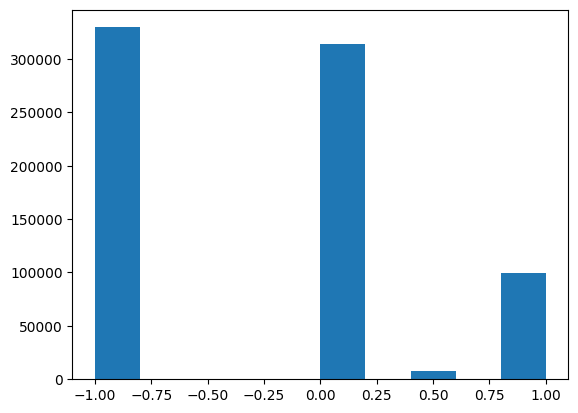

In [79]:
plt.hist(dr16_data['BAL_PROB'])

In [83]:
bal_qso_mask = (dr16_data['BAL_PROB'] == 0) & (dr16_data['zWarning'] == 0)


In [84]:
nonbal_qso_hdul = dr16_data[bal_qso_mask]

In [86]:
nonbal_qso_hdul

FITS_rec([('000000.36+070350.8', 1.53536894e-03,  7.06412931, 11279, 58449, 978, 'QSO', 'QSO', 1, 1.56554668, 0, -1., -1, -1, -1, 175096522, -1.   , 0, 0, -1.   , 0, -1., -1, -1., -1., 1, 1.57422745, 'PIPE', 1.57422745, 0, '1237669517441827491', 1.57483247, 0,   395.17112357, -1., 7682, 0., -1., 7682, 0.,  1.57139463,    0,  51.26856656, 1.57383165, 0,  28.66540576, 1.58936037, 0,  121.69651782, -1.        , 7682,    0.        ,  1.5748324, [-1.        , -1.        , -1.        , -1.        , -1.        ], [-1.        , -1.        , -1.        , -1.        , -1.        ], [-1., -1., -1., -1., -1.], 0., 0., 0., 0., 0., 0., 0., 0., 0.,             0, 0, 1024, 0, 0, 0, 0, 0, 0, [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -

In [91]:
col_l = ['SDSS_NAME', 'RA', 'DEC', 'PLATE', 'MJD', 'FIBERID', 'AUTOCLASS_PQN', 'Z', 'BAL_PROB', 'BI_CIV', 'AI_CIV', ]
nonbal_qso_df = Table(nonbal_qso_hdul)[col_l].to_pandas()

In [94]:
nonbal_qso_df

,SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,Z,BAL_PROB,BI_CIV,AI_CIV
0,000000.36+070350.8,0.001535,7.064129,11279,58449,978,QSO,1.574227,0.0,0.0,0.0
1,000000.36+274356.2,0.001526,27.732283,7695,57654,565,QSO,1.770552,0.0,0.0,0.0
2,000000.45+092308.2,0.001914,9.385637,11277,58450,705,QSO,2.024146,0.0,0.0,0.0
3,000000.45+174625.4,0.001898,17.773739,7596,56945,162,QSO,2.309000,0.0,0.0,0.0
4,000000.57+055630.8,0.002375,5.941903,8740,57367,694,QSO,2.102771,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
282976,235959.44+263405.3,359.997693,26.568165,7666,57339,828,QSO,2.019597,0.0,0.0,0.0
282977,235959.70+084505.2,359.998774,8.751452,6152,56164,12,QSO,2.205000,0.0,0.0,0.0
282978,235959.71+255838.4,359.998832,25.977356,7666,57339,844,QSO,3.309383,0.0,0.0,0.0
282979,235959.83+344315.0,359.999303,34.720842,7145,56567,240,QSO,3.109000,0.0,0.0,0.0


In [95]:
nonbal_qso_samp_df = nonbal_qso_df.sample(8000).reset_index(drop=True)

In [96]:
nonbal_qso_samp_df

,SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,Z,BAL_PROB,BI_CIV,AI_CIV
0,010754.97+261427.1,16.979045,26.240866,6255,56240,62,QSO,2.373000,0.0,0.0,0.0
1,021542.40+020942.5,33.926674,2.161808,7830,57043,692,QSO,1.792089,0.0,0.0,0.0
2,141816.54+403341.8,214.568930,40.561632,8504,57518,215,QSO,1.950256,0.0,0.0,0.0
3,124030.12+444343.9,190.125501,44.728876,8375,57520,556,QSO,2.297000,0.0,0.0,0.0
4,102059.73+583111.6,155.248897,58.519904,7086,56658,866,QSO,2.978000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7995,130355.33+372014.1,195.980559,37.337255,8870,57779,687,QSO,2.198637,0.0,0.0,0.0
7996,100927.11+420647.9,152.362967,42.113328,8302,57389,664,QSO,3.097453,0.0,0.0,0.0
7997,120642.14+054123.2,181.675596,5.689796,4831,55679,264,QSO,2.783000,0.0,0.0,0.0
7998,001013.06+014708.7,2.554430,1.785759,7853,56988,393,QSO,1.989397,0.0,0.0,0.0


In [97]:
nonbal_qso_samp_df.to_csv('../data/nonbal_qso_samp.csv')